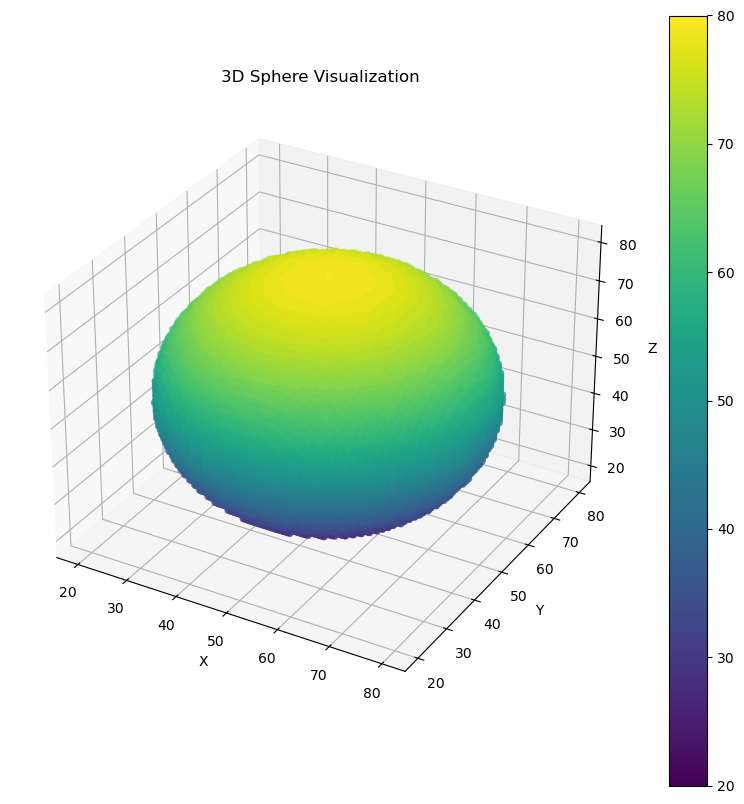

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D array (30x30x30) with a sphere pattern
x, y, z = np.indices((100, 100, 100))
center = (50, 50, 50)
radius = 30
sphere = (x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2 <= radius**2
data = np.zeros((100, 100, 100))
data[sphere] = 1

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the voxel coordinates where value is 1
x, y, z = data.nonzero()

# Plot the 3D points
scatter = ax.scatter(x, y, z, c=z, cmap='viridis')
plt.colorbar(scatter)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Sphere Visualization')

# Show the plot
plt.show()


In [2]:
data.shape

(100, 100, 100)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def crop_array_to_overlapping_cubes(image, cubic_size, overlap):
    """
    Crops a 3D array into overlapping cubic regions of a given size.

    Args:
        image (np.ndarray): The input 3D numpy array to crop.
        cubic_size (int): The size of each cubic region (side length).
        overlap (int): The number of pixels to overlap between adjacent cubes.

    Returns:
        List[Tuple[np.ndarray, List[int]]]: List of overlapping cubic regions and their boundaries.
    """
    if len(image.shape) != 3:
        raise ValueError("Input image must be a 3D numpy array.")

    if overlap >= cubic_size:
        raise ValueError("Overlap must be smaller than cubic_size.")

    # Get dimensions of the input image
    depth, height, width = image.shape

    # Calculate the step size considering overlap
    step = cubic_size - overlap

    cubes = []
    overlapping_cubes = []

    # Iterate over the grid and extract overlapping cubic regions
    for d in range(0, depth - cubic_size + 1, step):
        for h in range(0, height - cubic_size + 1, step):
            for w in range(0, width - cubic_size + 1, step):
                start_d = d
                start_h = h
                start_w = w

                end_d = start_d + cubic_size
                end_h = start_h + cubic_size
                end_w = start_w + cubic_size

                cube = image[start_d:end_d, start_h:end_h, start_w:end_w]
                cubes.append((cube, [start_d, end_d, start_h, end_h, start_w, end_w]))

                # Define overlapping boundaries
                overlap_start_d = max(0, start_d - overlap)
                overlap_start_h = max(0, start_h - overlap)
                overlap_start_w = max(0, start_w - overlap)

                overlap_end_d = min(depth, end_d + overlap)
                overlap_end_h = min(height, end_h + overlap)
                overlap_end_w = min(width, end_w + overlap)

                cube_overlap = image[overlap_start_d:overlap_end_d, overlap_start_h:overlap_end_h, overlap_start_w:overlap_end_w]
                overlapping_cubes.append((cube_overlap, [overlap_start_d, overlap_end_d, overlap_start_h, overlap_end_h, overlap_start_w, overlap_end_w]))

    return cubes, overlapping_cubes

def plot_cubes_with_boundaries(cubes, title_prefix="Cube"):
    """
    Plots the first few cubic regions in 3D along with their boundaries as connected lines.

    Args:
        cubes (List[np.ndarray]): List of cubic regions to plot.
        title_prefix (str): Prefix for the plot titles.
    """
    for i, (cube, boundaries) in enumerate(cubes[:5]):  # Limit to the first 5 cubes for visualization
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Create a grid of coordinates for the cube
        z, y, x = np.nonzero(cube)

        # Scatter plot for the cube data
        ax.scatter(x, y, z, c=cube[z, y, x], cmap='viridis', label="Cube Points")

        # Plot the boundaries as connected lines
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='red', label="Boundary")

        ax.set_title(f"{title_prefix} {i} Boundaries: {boundaries}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        plt.legend()
        plt.show()

def draw_combined_boundaries_in_3d(original_cubes, overlapping_cubes):
    """
    Draws the original and overlapping boundaries in the same 3D frame.

    Args:
        original_cubes (List[Tuple[np.ndarray, List[int]]]): Original cubes and their boundaries.
        overlapping_cubes (List[Tuple[np.ndarray, List[int]]]): Overlapping cubes and their boundaries.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot original boundaries
    for _, boundaries in original_cubes:
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='blue', label="Original Boundary")

    # Plot overlapping boundaries
    for _, boundaries in overlapping_cubes:
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='red', label="Overlapping Boundary")

    ax.set_title("Original and Overlapping Boundaries")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()





Number of original cubes: 8
Original Cube 0 shape: (50, 50, 50), Boundaries: [0, 50, 0, 50, 0, 50]
Original Cube 1 shape: (50, 50, 50), Boundaries: [0, 50, 0, 50, 46, 96]
Original Cube 2 shape: (50, 50, 50), Boundaries: [0, 50, 46, 96, 0, 50]
Original Cube 3 shape: (50, 50, 50), Boundaries: [0, 50, 46, 96, 46, 96]
Original Cube 4 shape: (50, 50, 50), Boundaries: [46, 96, 0, 50, 0, 50]
Number of overlapping cubes: 8
Overlapping Cube 0 shape: (54, 54, 54), Boundaries: [0, 54, 0, 54, 0, 54]
Overlapping Cube 1 shape: (54, 54, 58), Boundaries: [0, 54, 0, 54, 42, 100]
Overlapping Cube 2 shape: (54, 58, 54), Boundaries: [0, 54, 42, 100, 0, 54]
Overlapping Cube 3 shape: (54, 58, 58), Boundaries: [0, 54, 42, 100, 42, 100]
Overlapping Cube 4 shape: (58, 54, 54), Boundaries: [42, 100, 0, 54, 0, 54]


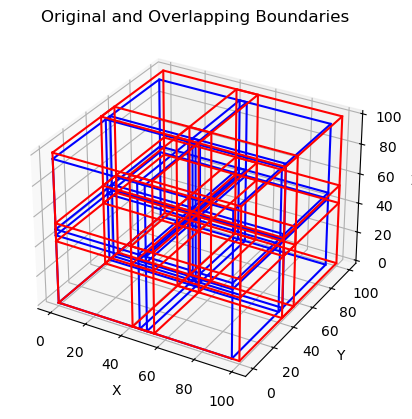

In [4]:

# Example usage
# image = np.random.rand(50, 50, 50)  # Example 3D image
image = data

cubic_size = 50
overlap = 4
cubes, overlapping_cubes = crop_array_to_overlapping_cubes(image, cubic_size, overlap)

print(f"Number of original cubes: {len(cubes)}")
for i, (cube, boundaries) in enumerate(cubes[:5]):  # Display the first few original cubes
    print(f"Original Cube {i} shape: {cube.shape}, Boundaries: {boundaries}")

print(f"Number of overlapping cubes: {len(overlapping_cubes)}")
for i, (cube_overlap, boundaries) in enumerate(overlapping_cubes[:5]):  # Display the first few overlapping cubes
    print(f"Overlapping Cube {i} shape: {cube_overlap.shape}, Boundaries: {boundaries}")

# Draw combined boundaries in 3D
draw_combined_boundaries_in_3d(cubes, overlapping_cubes)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def crop_array_to_overlapping_cubes(image, cubic_size, overlap):
    """
    Crops a 3D array into overlapping cubic regions of a given size.

    Args:
        image (np.ndarray): The input 3D numpy array to crop.
        cubic_size (int): The size of each cubic region (side length).
        overlap (int): The number of pixels to overlap between adjacent cubes.

    Returns:
        List[Tuple[np.ndarray, List[int]]]: List of overlapping cubic regions and their boundaries.
    """
    if len(image.shape) != 3:
        raise ValueError("Input image must be a 3D numpy array.")

    if overlap >= cubic_size:
        raise ValueError("Overlap must be smaller than cubic_size.")

    # Get dimensions of the input image
    depth, height, width = image.shape

    # Calculate the step size considering overlap
    step = cubic_size

    cubes = []
    overlapping_cubes = []

    # Iterate over the grid and extract overlapping cubic regions
    for d in range(0, depth + 1, step):
        for h in range(0, height  + 1, step):
            for w in range(0, width + 1, step):
                start_d = d
                start_h = h
                start_w = w

                end_d = start_d + cubic_size
                end_h = start_h + cubic_size
                end_w = start_w + cubic_size


                cube = image[start_d:end_d, start_h:end_h, start_w:end_w]
                cubes.append((cube, [start_d, end_d, start_h, end_h, start_w, end_w]))

                # Define overlapping boundaries
                overlap_start_d = max(0, start_d - overlap)
                overlap_start_h = max(0, start_h - overlap)
                overlap_start_w = max(0, start_w - overlap)

                overlap_end_d = min(depth, end_d + overlap)
                overlap_end_h = min(height, end_h + overlap)
                overlap_end_w = min(width, end_w + overlap)

                cube_overlap = image[overlap_start_d:overlap_end_d, overlap_start_h:overlap_end_h, overlap_start_w:overlap_end_w]
                overlapping_cubes.append((cube_overlap, [overlap_start_d, overlap_end_d, overlap_start_h, overlap_end_h, overlap_start_w, overlap_end_w]))

    return cubes, overlapping_cubes

def plot_cubes_with_boundaries(cubes, title_prefix="Cube"):
    """
    Plots the first few cubic regions in 3D along with their boundaries as connected lines.

    Args:
        cubes (List[np.ndarray]): List of cubic regions to plot.
        title_prefix (str): Prefix for the plot titles.
    """
    for i, (cube, boundaries) in enumerate(cubes[:5]):  # Limit to the first 5 cubes for visualization
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Create a grid of coordinates for the cube
        z, y, x = np.nonzero(cube)

        # Scatter plot for the cube data
        ax.scatter(x, y, z, c=cube[z, y, x], cmap='viridis', label="Cube Points")

        # Plot the boundaries as connected lines
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='red', label="Boundary")

        ax.set_title(f"{title_prefix} {i} Boundaries: {boundaries}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        plt.legend()
        plt.show()

def draw_combined_boundaries_in_3d(original_cubes, overlapping_cubes):
    """
    Draws the original and overlapping boundaries in the same 3D frame.

    Args:
        original_cubes (List[Tuple[np.ndarray, List[int]]]): Original cubes and their boundaries.
        overlapping_cubes (List[Tuple[np.ndarray, List[int]]]): Overlapping cubes and their boundaries.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot original boundaries
    for _, boundaries in original_cubes:
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='blue', label="Original Boundary")

    # Plot overlapping boundaries
    for _, boundaries in overlapping_cubes:
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='red', label="Overlapping Boundary")

    ax.set_title("Original and Overlapping Boundaries")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tifffile as tiff

def crop_array_to_overlapping_cubes(image, cubic_size, overlap):
    """
    Crops a 3D array into overlapping cubic regions of a given size.

    Args:
        image (np.ndarray): The input 3D numpy array to crop.
        cubic_size (int): The size of each cubic region (side length).
        overlap (int): The number of pixels to overlap between adjacent cubes.

    Returns:
        List[Tuple[np.ndarray, List[int]]]: List of overlapping cubic regions and their boundaries.
    """
    if len(image.shape) != 3:
        raise ValueError("Input image must be a 3D numpy array.")

    if overlap >= cubic_size:
        raise ValueError("Overlap must be smaller than cubic_size.")

    # Get dimensions of the input image
    depth, height, width = image.shape

    # Adjust cubic size if it exceeds the depth
    adjusted_cubic_size = min(cubic_size, depth)

    # Calculate the step size considering overlap
    step = adjusted_cubic_size 

    cubes = []
    overlapping_cubes = []

    # Iterate over the grid and extract overlapping cubic regions
    for d in range(0, depth + 1, step):
        for h in range(0, height + 1, step):
            for w in range(0, width + 1, step):
                start_d = d
                start_h = h
                start_w = w

                end_d = start_d + adjusted_cubic_size
                end_h = start_h + adjusted_cubic_size
                end_w = start_w + adjusted_cubic_size

                cube = image[start_d:end_d, start_h:end_h, start_w:end_w]
                cubes.append((cube, [start_d, end_d, start_h, end_h, start_w, end_w]))

                # Define overlapping boundaries
                overlap_start_d = max(0, start_d - overlap)
                overlap_start_h = max(0, start_h - overlap)
                overlap_start_w = max(0, start_w - overlap)

                overlap_end_d = min(depth, end_d + overlap)
                overlap_end_h = min(height, end_h + overlap)
                overlap_end_w = min(width, end_w + overlap)

                cube_overlap = image[overlap_start_d:overlap_end_d, overlap_start_h:overlap_end_h, overlap_start_w:overlap_end_w]
                overlapping_cubes.append((cube_overlap, [overlap_start_d, overlap_end_d, overlap_start_h, overlap_end_h, overlap_start_w, overlap_end_w]))

    return cubes, overlapping_cubes

def save_cubes_as_tiff(cubes, base_filename):
    """
    Saves each cube as a separate TIFF file.

    Args:
        cubes (List[Tuple[np.ndarray, List[int]]]): List of cubes and their boundaries.
        base_filename (str): Base filename for saving the TIFF files.
    """
    for i, (cube, boundaries) in enumerate(cubes):
        filename = f"{base_filename}_cube_{i}.tif"
        tiff.imwrite(filename, cube)
        print(f"Saved: {filename}")

def plot_cubes_with_boundaries(cubes, title_prefix="Cube"):
    """
    Plots the first few cubic regions in 3D along with their boundaries as connected lines.

    Args:
        cubes (List[np.ndarray]): List of cubic regions to plot.
        title_prefix (str): Prefix for the plot titles.
    """
    for i, (cube, boundaries) in enumerate(cubes[:5]):  # Limit to the first 5 cubes for visualization
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Create a grid of coordinates for the cube
        z, y, x = np.nonzero(cube)

        # Scatter plot for the cube data
        ax.scatter(x, y, z, c=cube[z, y, x], cmap='viridis', label="Cube Points")

        # Plot the boundaries as connected lines
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='red', label="Boundary")

        ax.set_title(f"{title_prefix} {i} Boundaries: {boundaries}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        plt.legend()
        plt.show()

def draw_combined_boundaries_in_3d(original_cubes, overlapping_cubes):
    """
    Draws the original and overlapping boundaries in the same 3D frame.

    Args:
        original_cubes (List[Tuple[np.ndarray, List[int]]]): Original cubes and their boundaries.
        overlapping_cubes (List[Tuple[np.ndarray, List[int]]]): Overlapping cubes and their boundaries.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot original boundaries
    for _, boundaries in original_cubes:
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='blue', label="Original Boundary")

    # Plot overlapping boundaries
    for _, boundaries in overlapping_cubes:
        start_d, end_d, start_h, end_h, start_w, end_w = boundaries
        lines = [
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [start_d, start_d, start_d, start_d, start_d]],
            [[start_w, start_w, end_w, end_w, start_w], [start_h, end_h, end_h, start_h, start_h], [end_d, end_d, end_d, end_d, end_d]],
            [[start_w, start_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [start_h, start_h], [start_d, end_d]],
            [[end_w, end_w], [end_h, end_h], [start_d, end_d]],
            [[start_w, start_w], [end_h, end_h], [start_d, end_d]]
        ]
        for line in lines:
            ax.plot(line[0], line[1], line[2], color='red', label="Overlapping Boundary")

    ax.set_title("Original and Overlapping Boundaries")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()

# Example usage
# original_image = tiff.imread("path_to_your_3d_tif_file.tif")
cubic_size = 390
overlap = 100
cubes, overlapping_cubes = crop_array_to_overlapping_cubes(original_image, cubic_size, overlap)

print(f"Number of original cubes: {len(cubes)}")
for i, (cube, boundaries) in enumerate(cubes[:8]):  # Display the first few original cubes
    print(f"Original Cube {i} shape: {cube.shape}, Boundaries: {boundaries}")

print(f"Number of overlapping cubes: {len(overlapping_cubes)}")
for i, (cube_overlap, boundaries) in enumerate(overlapping_cubes[:8]):  # Display the first few overlapping cubes
    print(f"Overlapping Cube {i} shape: {cube_overlap.shape}, Boundaries: {boundaries}")

# Save the cubes as TIFF files
save_cubes_as_tiff(overlapping_cubes, base_filename="G:/Alexis_data/Project/FISH/output/overlapping_cube")


Number of original cubes: 18
Original Cube 0 shape: (390, 390, 390), Boundaries: [0, 390, 0, 390, 0, 390]
Original Cube 1 shape: (390, 390, 390), Boundaries: [0, 390, 0, 390, 390, 780]
Original Cube 2 shape: (390, 390, 244), Boundaries: [0, 390, 0, 390, 780, 1170]
Original Cube 3 shape: (390, 390, 390), Boundaries: [0, 390, 390, 780, 0, 390]
Original Cube 4 shape: (390, 390, 390), Boundaries: [0, 390, 390, 780, 390, 780]
Original Cube 5 shape: (390, 390, 244), Boundaries: [0, 390, 390, 780, 780, 1170]
Original Cube 6 shape: (390, 384, 390), Boundaries: [0, 390, 780, 1170, 0, 390]
Original Cube 7 shape: (390, 384, 390), Boundaries: [0, 390, 780, 1170, 390, 780]
Number of overlapping cubes: 18
Overlapping Cube 0 shape: (390, 490, 490), Boundaries: [0, 390, 0, 490, 0, 490]
Overlapping Cube 1 shape: (390, 490, 590), Boundaries: [0, 390, 0, 490, 290, 880]
Overlapping Cube 2 shape: (390, 490, 344), Boundaries: [0, 390, 0, 490, 680, 1024]
Overlapping Cube 3 shape: (390, 590, 490), Boundaries:

In [34]:
# Example usage
# image = np.random.rand(50, 50, 50)  # Example 3D image
image = data

cubic_size = 50
overlap = 4
cubes, overlapping_cubes = crop_array_to_overlapping_cubes(image, cubic_size, overlap)

print(f"Number of original cubes: {len(cubes)}")
for i, (cube, boundaries) in enumerate(cubes[:5]):  # Display the first few original cubes
    print(f"Original Cube {i} shape: {cube.shape}, Boundaries: {boundaries}")

print(f"Number of overlapping cubes: {len(overlapping_cubes)}")
for i, (cube_overlap, boundaries) in enumerate(overlapping_cubes[:5]):  # Display the first few overlapping cubes
    print(f"Overlapping Cube {i} shape: {cube_overlap.shape}, Boundaries: {boundaries}")




Number of original cubes: 27
Original Cube 0 shape: (50, 50, 50), Boundaries: [0, 50, 0, 50, 0, 50]
Original Cube 1 shape: (50, 50, 50), Boundaries: [0, 50, 0, 50, 50, 100]
Original Cube 2 shape: (50, 50, 0), Boundaries: [0, 50, 0, 50, 100, 150]
Original Cube 3 shape: (50, 50, 50), Boundaries: [0, 50, 50, 100, 0, 50]
Original Cube 4 shape: (50, 50, 50), Boundaries: [0, 50, 50, 100, 50, 100]
Number of overlapping cubes: 27
Overlapping Cube 0 shape: (54, 54, 54), Boundaries: [0, 54, 0, 54, 0, 54]
Overlapping Cube 1 shape: (54, 54, 54), Boundaries: [0, 54, 0, 54, 46, 100]
Overlapping Cube 2 shape: (54, 54, 4), Boundaries: [0, 54, 0, 54, 96, 100]
Overlapping Cube 3 shape: (54, 54, 54), Boundaries: [0, 54, 46, 100, 0, 54]
Overlapping Cube 4 shape: (54, 54, 54), Boundaries: [0, 54, 46, 100, 46, 100]


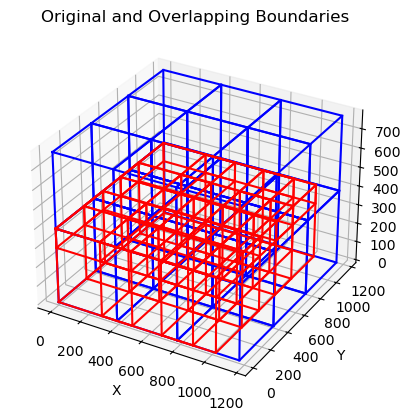

In [37]:
# Draw combined boundaries in 3D
draw_combined_boundaries_in_3d(cubes, overlapping_cubes)

In [28]:
import tifffile
import numpy as np


# Method 1: Using tifffile
original_image = tifffile.imread(r'G:\Alexis_data\Project\FISH\input\Heart2_round3_DAPI_resliced-q1-z1_cp_masks.tif')

# Print image shape and data type
print(f"Image shape: {original_image.shape}")
print(f"Data type: {original_image.dtype}")

# Display basic statistics
print(f"Min value: {np.min(original_image)}")
print(f"Max value: {np.max(original_image)}")
print(f"Mean value: {np.mean(original_image)}")

Image shape: (390, 1164, 1024)
Data type: uint16
Min value: 0
Max value: 15334
Mean value: 367.99247905110377


In [31]:
# real usage

cubic_size = 500
overlap = 100
cubes, overlapping_cubes = crop_array_to_overlapping_cubes(original_image, cubic_size, overlap)

print(f"Number of original cubes: {len(cubes)}")
for i, (cube, boundaries) in enumerate(cubes[:8]):  # Display the first few original cubes
    print(f"Original Cube {i} shape: {cube.shape}, Boundaries: {boundaries}")

print(f"Number of overlapping cubes: {len(overlapping_cubes)}")
for i, (cube_overlap, boundaries) in enumerate(overlapping_cubes[:8]):  # Display the first few overlapping cubes
    print(f"Overlapping Cube {i} shape: {cube_overlap.shape}, Boundaries: {boundaries}")


Number of original cubes: 9
Original Cube 0 shape: (390, 500, 500), Boundaries: [0, 500, 0, 500, 0, 500]
Original Cube 1 shape: (390, 500, 500), Boundaries: [0, 500, 0, 500, 500, 1000]
Original Cube 2 shape: (390, 500, 24), Boundaries: [0, 500, 0, 500, 1000, 1500]
Original Cube 3 shape: (390, 500, 500), Boundaries: [0, 500, 500, 1000, 0, 500]
Original Cube 4 shape: (390, 500, 500), Boundaries: [0, 500, 500, 1000, 500, 1000]
Original Cube 5 shape: (390, 500, 24), Boundaries: [0, 500, 500, 1000, 1000, 1500]
Original Cube 6 shape: (390, 164, 500), Boundaries: [0, 500, 1000, 1500, 0, 500]
Original Cube 7 shape: (390, 164, 500), Boundaries: [0, 500, 1000, 1500, 500, 1000]
Number of overlapping cubes: 9
Overlapping Cube 0 shape: (390, 600, 600), Boundaries: [0, 390, 0, 600, 0, 600]
Overlapping Cube 1 shape: (390, 600, 624), Boundaries: [0, 390, 0, 600, 400, 1024]
Overlapping Cube 2 shape: (390, 600, 124), Boundaries: [0, 390, 0, 600, 900, 1024]
Overlapping Cube 3 shape: (390, 700, 600), Boun

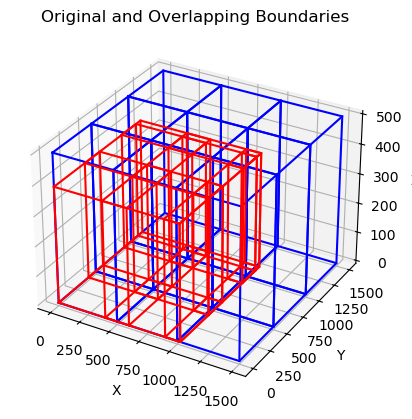

In [32]:
# Draw combined boundaries in 3D
draw_combined_boundaries_in_3d(cubes, overlapping_cubes)